# 데이터 전처리 - 결측치 다루기
* [Missing data - Wikipedia](https://en.wikipedia.org/wiki/Missing_data)
* 예제 데이터 다운로드 : https://www.kaggle.com/c/titanic/data

In [2]:
import pandas as pd
import numpy as np
import missingno as msno # 누락 된 데이터를 시각화 해주기 위해

import sys
print(sys.version)
print(pd.__version__)
print(np.__version__)
print(msno.__version__)

3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
0.23.0
1.14.3
0.4.1


In [3]:
# 판다스를 통해 데이터를 로드해 온다.
# 여기에서는 캐글의 타이타닉 데이터를 사용한다. 
# 데이터 다운로드 : https://www.kaggle.com/c/titanic/data 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


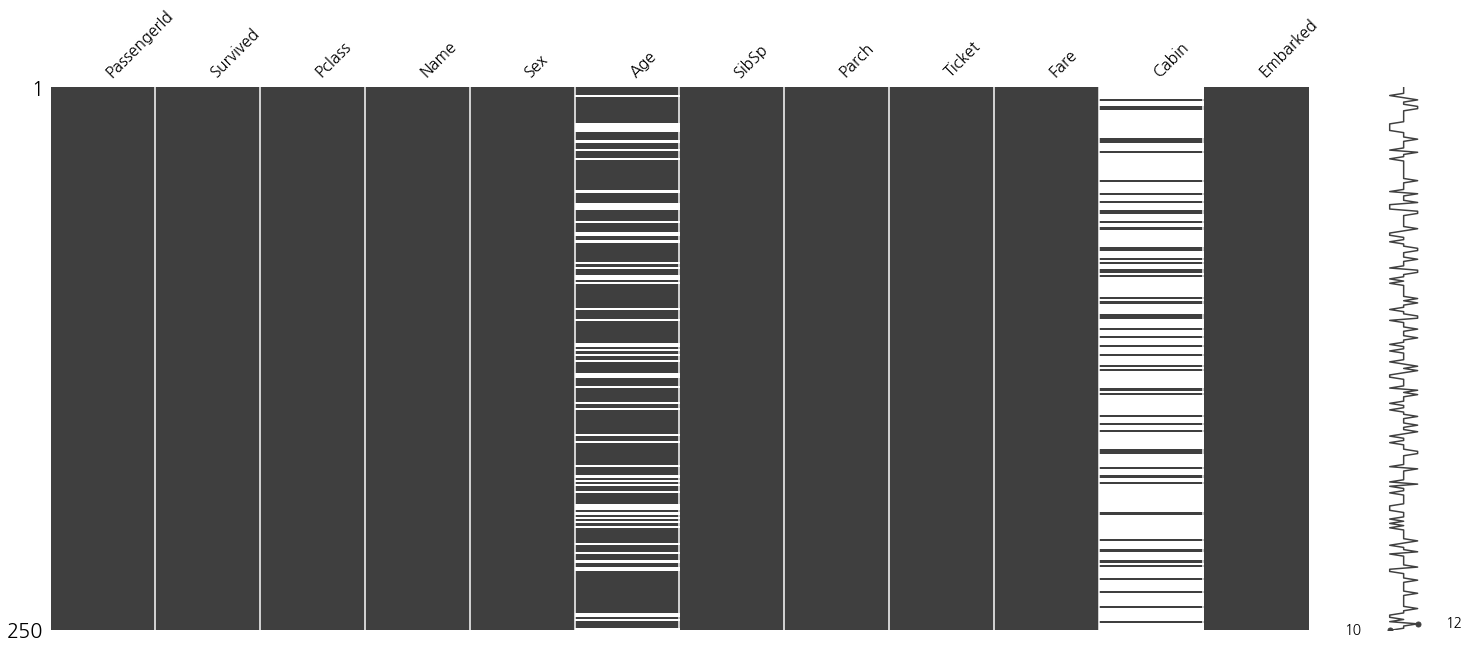

In [6]:
# 결측치를 시각화
%matplotlib inline
train = train.replace("nan", np.nan)
msno.matrix(train.sample(250))

In [7]:
# null 값 여부를 조회해 볼 수 있다.
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 1. 중간값이나 최빈값으로 채워줌

In [10]:
# copy(deep=True)일 경우 deep copy를
# (original data가 변해도 copy본에도 반영이 안됨)
# copy(deep=False)일 경우 shallow copy가 이루어진다
# (original data가 변하면 copy본에도 반영됨)
train_mean = train.copy(deep = True)
test_mean = test.copy(deep = True)

In [11]:
train_mean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [14]:
train['Ticket'].value_counts().head(7)

347082          7
1601            7
CA. 2343        7
3101295         6
347088          6
CA 2144         6
S.O.C. 14879    5
Name: Ticket, dtype: int64

In [15]:
train['Ticket'].value_counts().tail(7)

4138       1
8471       1
3101276    1
250643     1
364512     1
17465      1
250648     1
Name: Ticket, dtype: int64

In [16]:
# 정규표현식으로 티켓번호를 추출해 낸다.
# (\d{2,})에서 \d는 숫자를 의미하며, {2,}는 글자 수를 의미한다.
# 그래서 extract.('(\d{2,})')는 2자리 수 이상의 숫자를 추출하라는 의미이다.
train_mean['TicketNumber'] = train['Ticket'].str.extract('(\d{2,})', expand = True)
train_mean['TicketNumber'] = train_mean['TicketNumber'].apply(pd.to_numeric)

test_mean['TicketNumber'] = test['Ticket'].str.extract('(\d{2,})', expand = True)
test_mean['TicketNumber'] = test_mean['TicketNumber'].apply(pd.to_numeric)

In [17]:
train_mean['TicketNumber'].head()

0      21171.0
1      17599.0
2    3101282.0
3     113803.0
4     373450.0
Name: TicketNumber, dtype: float64

In [18]:
test_mean['TicketNumber'].head()

0     330911.0
1     363272.0
2     240276.0
3     315154.0
4    3101298.0
Name: TicketNumber, dtype: float64

In [19]:
def data_fillna(dataset):
    # 중간값으로 누락된 나이 데이터를 채워준다.
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    # 최빈값(가장 자주 나오는 값)으로 누락된 승선위치를 채워준다.
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    # 중간값으로 누락된 요금을 채워준다.
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
    # 중간값으로 티켓 번호를 채워준다.
    dataset['TicketNumber'].fillna(dataset['TicketNumber'].median(), inplace=True)

In [20]:
data_fillna(train_mean)
data_fillna(test_mean)

In [21]:
print(train.isnull().sum())
print('-' * 20)
print(train_mean.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
TicketNumber      0
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000007E11496A90>]],
      dtype=object)

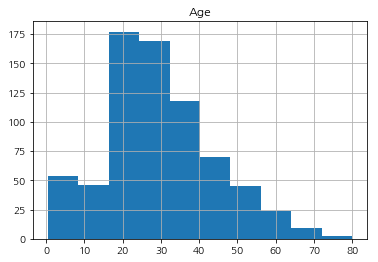

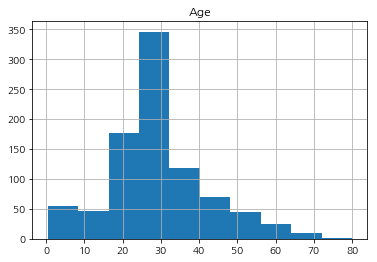

In [22]:
# 판다스의 시각화 툴을 사용해서 히스토그램 그래프를 그려본다.
# 중간값으로 채워주기 전 나이 데이터
train.hist(['Age'])
# 중간값으로 채워준 후의 나이 데이터
# 중간값이 눈에 띄게 늘어났다.
train_mean.hist(['Age'])

### 2. 사이킷런의 Imputer 를 사용

In [24]:
train_imputer = train.copy()
test_imputer = test.copy()

In [25]:
train_imputer['Age'][:5]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

#### Imputer를 사용해 보기에 앞서 shape와 reshape를 이해하고 넘어간다.

In [26]:
# 벡터 데이터의 형태를 출력해 본다.
print(train_imputer['Age'].values.shape)
# reshape(-1,1)를 사용해 벡터 데이터를 행렬 데이터로 변환해 준다.
print(train_imputer['Age'].values.reshape(-1,1).shape)

(891,)
(891, 1)


In [27]:
from sklearn.preprocessing import Imputer

# 결측치를 보완해 준다.
# sklearn의 imputer는 default로 mean값을 채워준다
def nan_padding(data, columns):
    for column in columns:
        imputer = Imputer()
        data[column] = imputer.fit_transform(data[column].values.reshape(-1,1))
    return data


nan_columns = ['Age', 'SibSp', 'Parch', 'Fare']

train_imputer = nan_padding(train_imputer, nan_columns)
test_imputer = nan_padding(test_imputer, nan_columns)

In [28]:
print(train.isnull().sum())
print('-' * 20)
print(train_imputer.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [29]:
train_imputer[nan_columns].head()

,Age,SibSp,Parch,Fare
0,22.0,1.0,0.0,7.2500
1,38.0,1.0,0.0,71.2833
2,26.0,0.0,0.0,7.9250
3,35.0,1.0,0.0,53.1000
4,35.0,0.0,0.0,8.0500


### 3. 다른 컬럼 정보를 사용해서 결측치를 예측

In [30]:
train_cp = train.copy()
test_cp = test.copy()

In [31]:
# 결측치가 있는 지 확인
train['Name'].isnull().sum()

0

In [32]:
# 일부의 데이터만 찍어보았지만 모든 데이터가 콤마(,)와 마침표(.)가 들어가 있다.
# 여기에서 콤마 뒤의 데이터가 호칭이며 Miss, Ms, Mrs 등으로 나이를 추측해 볼 수 있다.
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [33]:
# 이름에서 Title 항목만 떼어낸다.
# 콤마로 분리를 하고 분리된 두 번째 데이터의 첫번째 항목을 가져온다.
train['Title'] = train['Name'].str.split(
    ", ", expand=True)[1].str.split(".", expand=True)[0]
train['Title'].head()

test['Title'] = test['Name'].str.split(
    ", ", expand=True)[1].str.split(".", expand=True)[0]
test['Title'].head()

0     Mr
1    Mrs
2     Mr
3     Mr
4    Mrs
Name: Title, dtype: object

In [31]:
# 호칭의 갯수를 알아본다.
# Don은 스페인에서 세례명의 존칭 혹은 귀인을 뜻한다고 한다.
# Capt 또한 대위 또는 대령을 뜻한다.
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Sir               1
Lady              1
Mme               1
Jonkheer          1
Ms                1
Don               1
Capt              1
the Countess      1
Name: Title, dtype: int64

In [32]:
train.query("Title in ('Dona', 'Lady', 'the Countess')")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6,A16,C,Lady
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,the Countess


In [33]:
# 결혼한 여성 관련 호칭은 Mrs로 분류
train.loc[train['Title'].isin(['Dona', 'Lady', 'the Countess', 'Mme', 'Mlle']), 'Title'] = 'Ms'
test.loc[test['Title'].isin(['Dona', 'Lady', 'the Countess', 'Mme', 'Mlle']), 'Title'] = 'Ms'
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Ms            6
Col           2
Major         2
Sir           1
Jonkheer      1
Don           1
Capt          1
Name: Title, dtype: int64

In [34]:
train.loc[train['Title'].isin(['Don', 'Sir', 'Capt', 'Col', 'Major', 'Master', 'Rev', 'Dr', 'Jonkheer']), 'Title'] = 'Mr'
test.loc[test['Title'].isin(['Don', 'Sir', 'Capt', 'Col', 'Major', 'Master', 'Rev', 'Dr', 'Jonkheer']), 'Title'] = 'Mr'
train['Title'].value_counts()

Mr              578
Miss            182
Mrs             125
Mlle              2
the Countess      1
Mme               1
Ms                1
Lady              1
Name: Title, dtype: int64

In [35]:
train.Age.isnull().sum()

177

In [35]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

In [36]:
train.Age.isnull().sum()

0

In [38]:
train_rf = train.copy()
test_rf = test.copy()

In [39]:
train_rf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [40]:
train_rf['FamilySize'] = train_rf['SibSp'] + train_rf['Parch']+1
test_rf['FamilySize'] = test_rf['SibSp'] + test_rf['Parch']+1
print(train_rf['FamilySize'].value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64


In [41]:
train_rf.loc[train_rf['FamilySize'] == 1, 'FsizeD'] = 'singleton'
train_rf.loc[(train_rf['FamilySize'] > 1)  &  (train_rf['FamilySize'] < 5) , 'FsizeD'] = 'small'
train_rf.loc[train_rf['FamilySize'] > 4, 'FsizeD'] = 'large'

test_rf.loc[test_rf['FamilySize'] == 1, 'FsizeD'] = 'singleton'
test_rf.loc[(test_rf['FamilySize'] > 1) & (test_rf['FamilySize'] <5) , 'FsizeD'] = 'small'
test_rf.loc[test_rf['FamilySize'] > 4, 'FsizeD'] = 'large'
print(train_rf['FsizeD'].unique())
print(train_rf['FsizeD'].value_counts())

['small' 'singleton' 'large']
singleton    537
small        292
large         62
Name: FsizeD, dtype: int64


In [43]:
train_rf["NameLength"] = train["Name"].apply(lambda x: len(x))
test_rf["NameLength"] = test["Name"].apply(lambda x: len(x))

bins = [0, 20, 40, 57, 85]
group_names = ['short', 'okay', 'good', 'long']
train_rf['NlengthD'] = pd.cut(train_rf['NameLength'], bins, labels=group_names)
test_rf['NlengthD'] = pd.cut(test_rf['NameLength'], bins, labels=group_names)

In [44]:
print(train_rf["NlengthD"].unique())
train_rf["NlengthD"].value_counts()

[okay, good, short, long]
Categories (4, object): [short < okay < good < long]


okay     558
short    243
good      86
long       4
Name: NlengthD, dtype: int64

In [44]:
train_rf['Deck'] = train_rf.Cabin.str[0]
test_rf['Deck'] = test_rf.Cabin.str[0]
train_rf['Deck'].unique() # 0 is for null values

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [45]:
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data

def drop_data(data, columns):
    for column in columns:
        data = data.drop(column, axis=1)
    return data

In [46]:
dummy_columns = ['Sex', 'Pclass', 'Embarked', 'Title', 'FsizeD', 'NlengthD']

train_rf = dummy_data(train_rf, dummy_columns)
test_rf = dummy_data(test_rf, dummy_columns)

drop_columns = ['Name', 'Ticket', 'Cabin', 'Fare', 'Deck', 'Parch', 'SibSp', 'FamilySize']
train_rf = drop_data(train_rf, drop_columns)
train_rf = train_rf.drop('Survived', axis=1)
test_rf = drop_data(test_rf, drop_columns)

In [47]:
train_rf.shape

(891, 22)

In [48]:
test_rf.shape

(418, 22)

In [49]:
train_rf.columns

Index(['PassengerId', 'Age', 'NameLength', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Ms',
       'FsizeD_large', 'FsizeD_singleton', 'FsizeD_small', 'NlengthD_short',
       'NlengthD_okay', 'NlengthD_good', 'NlengthD_long'],
      dtype='object')

In [50]:
train_array = np.array(train_rf.columns)
test_array = np.array(test_rf.columns)

In [51]:
np.setdiff1d(train_array, test_array)

array([], dtype=object)

In [52]:
train_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
PassengerId         891 non-null int64
Age                 714 non-null float64
NameLength          891 non-null int64
Sex_female          891 non-null uint8
Sex_male            891 non-null uint8
Pclass_1            891 non-null uint8
Pclass_2            891 non-null uint8
Pclass_3            891 non-null uint8
Embarked_C          891 non-null uint8
Embarked_Q          891 non-null uint8
Embarked_S          891 non-null uint8
Title_Miss          891 non-null uint8
Title_Mr            891 non-null uint8
Title_Mrs           891 non-null uint8
Title_Ms            891 non-null uint8
FsizeD_large        891 non-null uint8
FsizeD_singleton    891 non-null uint8
FsizeD_small        891 non-null uint8
NlengthD_short      891 non-null uint8
NlengthD_okay       891 non-null uint8
NlengthD_good       891 non-null uint8
NlengthD_long       891 non-null uint8
dtypes: float64(1), int64(2), uint8

In [53]:
train_rf.Age.isnull().sum()

177

In [54]:
# https://www.kaggle.com/poonaml/titanic-survival-prediction-end-to-end-ml-pipeline
from sklearn.ensemble import RandomForestRegressor

def fill_missing_age(df):
    
    # Age값을 기준으로 학습과 테스트 세트로 분리
    train  = df.loc[ (df.Age.notnull()) ]# Age 값이 있는 row 
    test = df.loc[ (df.Age.isnull()) ]# Age 값이 없는 row 
    
    print(train.columns)
    # Age Label 데이터
    y = train['Age']
    
    # 피처를 생성해 준다.
    train_X = train.values[:, 2::]
    test_X = test.values[:, 2::]
    
    print(train_X.shape)
    print(test_X.shape)
    print(len(y))
    
    # 모델을 학습시킨다.
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(train_X, y)
    
    # 학습한 데이터를 바탕으로 결측치를 예측한다.
    predictedAges = rtr.predict(test_X)
    
    # 예측한 값을 Age가 null 인 데이터에 채워준다. 
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df

In [ ]:
train_rf.head()

,PassengerId,Age,NameLength,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,Title_Mr,Title_Mrs,Title_Ms,FsizeD_large,FsizeD_singleton,FsizeD_small,NlengthD_short,NlengthD_okay,NlengthD_good,NlengthD_long
0,1,22.0,23,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
1,2,38.0,51,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,3,26.0,22,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,4,35.0,44,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,5,35.0,24,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0


In [ ]:
train_rf = fill_missing_age(train_rf)

Index(['PassengerId', 'Age', 'NameLength', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Ms',
       'FsizeD_large', 'FsizeD_singleton', 'FsizeD_small', 'NlengthD_short',
       'NlengthD_okay', 'NlengthD_good', 'NlengthD_long'],
      dtype='object')
(714, 20)
(177, 20)
714


In [ ]:
train_rf.Age.isnull().sum()

참고 : 
* https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
* https://www.kaggle.com/poonaml/titanic-survival-prediction-end-to-end-ml-pipeline